In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv("../data/Titanic-Dataset.csv")

🔹 df.head()
👉 Helps you:

Understand columns

See sample data

Detect obvious issues

In [120]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


🔹 df.info()
Shows:

✔ Number of rows
✔ Column names
✔ Data types
✔ Missing values

👉 This is one of the most important ML commands.

In [121]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


🔹 df.describe()
Includes:

Mean

Std deviation

Min/Max

Quartiles

👉 Only numeric columns by default.

In [122]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [123]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='str')

In [124]:
df.shape

(891, 12)

Missing Values Check:
You’ll see missing values in:

Age

Cabin

Embarked

In [125]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

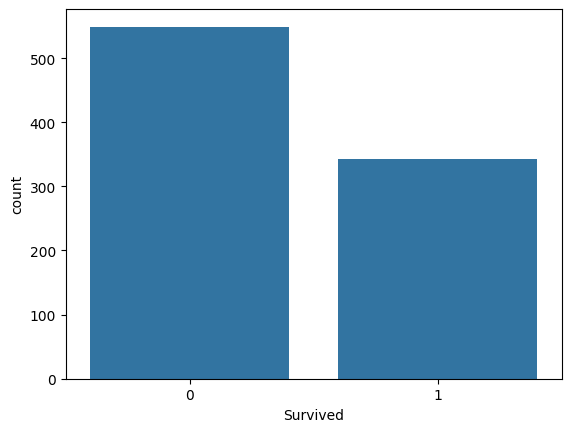

In [126]:
sns.countplot(x='Survived', data=df)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

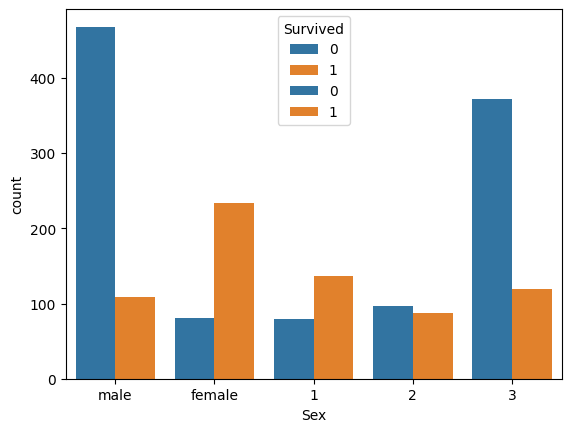

In [127]:
sns.countplot(x='Sex', hue='Survived', data=df)
sns.countplot(x='Pclass', hue='Survived', data=df)

In [128]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name               str
Sex                str
Age            float64
SibSp            int64
Parch            int64
Ticket             str
Fare           float64
Cabin              str
Embarked           str
dtype: object

Step-3 - Data Cleaning

Handle Missing Values

In [129]:
df['Age'] = df['Age'].fillna(df['Age'].median(), inplace=False)

In [131]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=False)

In [132]:
df.drop('Cabin', axis=1, inplace=True)

Step 4 - Feature engineering

In [133]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [135]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [137]:
df['FamilySize'] = df['SibSp']+df['Parch']+1

In [139]:
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

Step 5 - Feature Scaling

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [142]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
 9   FamilySize  891 non-null    int64  
dtypes: bool(2), float64(2), int64(6)
memory usage: 57.6 KB


In [146]:
df.isna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False


In [147]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
FamilySize    0
dtype: int64

In [148]:
df.notnull().sum()

Survived      891
Pclass        891
Sex           891
Age           891
SibSp         891
Parch         891
Fare          891
Embarked_Q    891
Embarked_S    891
FamilySize    891
dtype: int64

In [149]:
df.notna().sum()

Survived      891
Pclass        891
Sex           891
Age           891
SibSp         891
Parch         891
Fare          891
Embarked_Q    891
Embarked_S    891
FamilySize    891
dtype: int64

In [150]:
invalid_rows = df[df.isna().any(axis=1)]

In [151]:
invalid_rows

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize


In [152]:
missing_count = df.isna().sum()

In [153]:
df.duplicated().sum()

np.int64(116)

In [154]:
df = df.drop_duplicates()

In [155]:
df.info()

<class 'pandas.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    775 non-null    int64  
 1   Pclass      775 non-null    int64  
 2   Sex         775 non-null    int64  
 3   Age         775 non-null    float64
 4   SibSp       775 non-null    int64  
 5   Parch       775 non-null    int64  
 6   Fare        775 non-null    float64
 7   Embarked_Q  775 non-null    bool   
 8   Embarked_S  775 non-null    bool   
 9   FamilySize  775 non-null    int64  
dtypes: bool(2), float64(2), int64(6)
memory usage: 56.0 KB


In [156]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
FamilySize    0
dtype: int64

In [157]:
(df.isnull().sum()/len(df))*100

Survived      0.0
Pclass        0.0
Sex           0.0
Age           0.0
SibSp         0.0
Parch         0.0
Fare          0.0
Embarked_Q    0.0
Embarked_S    0.0
FamilySize    0.0
dtype: float64

In [158]:
df['Sex'].value_counts()

Sex
0    483
1    292
Name: count, dtype: int64

In [160]:
df[['Embarked_Q', 'Embarked_S']] = df[['Embarked_Q','Embarked_S']].astype(int)

In [161]:
df.info()

<class 'pandas.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    775 non-null    int64  
 1   Pclass      775 non-null    int64  
 2   Sex         775 non-null    int64  
 3   Age         775 non-null    float64
 4   SibSp       775 non-null    int64  
 5   Parch       775 non-null    int64  
 6   Fare        775 non-null    float64
 7   Embarked_Q  775 non-null    int64  
 8   Embarked_S  775 non-null    int64  
 9   FamilySize  775 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 66.6 KB


Step 6 - Train/Test Split

In [166]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 7 - Model Training

Logistic Regression

In [167]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

Step 8 -Evalution

In [168]:
from sklearn.metrics import accuracy_score, classification_report 

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7677419354838709
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        95
           1       0.70      0.70      0.70        60

    accuracy                           0.77       155
   macro avg       0.76      0.76      0.76       155
weighted avg       0.77      0.77      0.77       155

